In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('roas_30_days.csv')
# df = df.fillna(0)
df.head()

,ad_id,source,ad_start,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,z3_coverage,n_connected_calls,revenue,roas
0,120200176763890164,fb,"12 October, 2023",30,"22,513.79","1,382,232","6,264",0.453180,678,77.58,14.01,50.29,26.24,0,"41,300",1.83
1,120200380862490164,fb,"13 October, 2023",8,656.17,"16,037",93,0.579909,0,NaN,NaN,NaN,NaN,NaN,0,0.00
2,120200382263810164,fb,"13 October, 2023",15,944.19,"16,955",86,0.507225,0,NaN,NaN,NaN,NaN,NaN,0,0.00
3,120200382328750164,fb,"13 October, 2023",4,65.08,751,6,0.800000,0,NaN,NaN,NaN,NaN,NaN,0,0.00
4,120200449814490164,fb,"14 October, 2023",15,553.32,"23,049",64,0.277669,10,100.00,50.00,10.00,40.00,0,0,0.00


In [11]:
df.spend = df.spend.str.replace(',','').astype(float)
df.clicks = df.clicks.str.replace(',','').astype(int)
df.impressions = df.impressions.str.replace(',','').astype(int)
df.n_connected_calls = df.n_connected_calls.str.replace(',','').astype(float)
df.revenue = df.revenue.str.replace(',','').astype(float)
df.n_leads = df.n_leads.str.replace(',','').astype(int)
# df.roas = df.roas.str.replace(',','').astype(float)
df.ad_start = pd.to_datetime(df.ad_start, format= '%d %B, %Y')

In [12]:
df[df.roas==0].describe()

,ad_id,ad_start,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,z3_coverage,n_connected_calls,revenue,roas
count,2.055000e+03,2055,2055.000000,2055.000000,2.055000e+03,2055.000000,2055.000000,2055.000000,715.000000,715.000000,715.000000,680.000000,715.000000,2055.0,2055.0
mean,5.840324e+16,2024-01-02 08:03:30.218978048,11.636983,1653.522184,6.448498e+04,414.191241,0.565211,6.189781,77.083608,27.599399,26.801678,54.994824,4.455944,0.0,0.0
min,6.337419e+11,2022-11-16 00:00:00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,7.072455e+11,2023-08-12 12:00:00,3.000000,55.240000,1.603500e+03,6.000000,0.280000,0.000000,66.670000,0.000000,0.000000,33.330000,0.000000,0.0,0.0
50%,2.385786e+16,2024-01-03 00:00:00,8.000000,241.420000,7.776000e+03,36.000000,0.459016,0.000000,82.350000,24.870000,8.330000,54.550000,0.000000,0.0,0.0
75%,1.202081e+17,2024-05-10 00:00:00,18.000000,894.800000,3.199700e+04,154.000000,0.670000,2.000000,100.000000,40.000000,50.000000,80.000000,2.000000,0.0,0.0
max,1.202139e+17,2024-11-08 00:00:00,30.000000,176977.220000,6.561276e+06,93511.000000,14.380000,316.000000,100.000000,100.000000,100.000000,133.330000,158.000000,0.0,0.0
std,5.383777e+16,NaN,9.801118,8135.299708,3.060022e+05,2734.365964,0.774326,23.116444,25.308824,26.862015,34.698984,32.808224,13.708927,0.0,0.0


In [13]:
df[(df.roas <= 1) & (df.roas>0)].describe()

,ad_id,ad_start,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,z3_coverage,n_connected_calls,revenue,roas
count,7.200000e+01,72,72.000000,72.000000,7.200000e+01,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,5.675277e+16,2024-03-25 22:00:00,27.013889,19154.799722,1.426738e+06,7438.680556,0.572667,650.097222,72.421944,25.135972,20.420761,50.896389,24.902778,12148.611111,0.621468
min,6.785395e+11,2023-09-18 00:00:00,8.000000,1536.640000,3.005500e+04,121.000000,0.021457,21.000000,27.830000,9.470000,0.000000,19.490000,0.000000,500.000000,0.152396
25%,6.938973e+11,2024-01-05 06:00:00,27.000000,5327.925000,2.649260e+05,1024.750000,0.358979,94.500000,69.235000,18.865000,4.737500,39.422500,0.000000,3000.000000,0.416191
50%,2.386231e+16,2024-03-09 00:00:00,30.000000,9586.910000,5.423645e+05,2486.500000,0.426028,256.500000,72.530000,24.615000,11.995000,47.780000,0.000000,5000.000000,0.639079
75%,1.202079e+17,2024-05-13 00:00:00,30.000000,19931.740000,1.132536e+06,5720.000000,0.590085,564.500000,77.435000,29.600000,24.035000,62.320000,18.750000,12750.000000,0.813213
max,1.202139e+17,2024-11-08 00:00:00,30.000000,125095.070000,1.629266e+07,67859.000000,4.280000,7582.000000,93.260000,59.260000,94.830000,100.000000,301.000000,86000.000000,0.982453
std,5.907661e+16,NaN,5.314061,24755.735996,2.563875e+06,14302.640719,0.536678,1208.349359,10.437898,9.365130,23.752853,18.744001,53.863458,16973.958870,0.233840


In [14]:
df[(df.roas > 1) & (df.roas<10)].describe()

,ad_id,ad_start,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,z3_coverage,n_connected_calls,revenue,roas
count,4.530000e+02,453,453.000000,453.000000,4.530000e+02,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,6.145509e+16,2024-04-15 13:46:29.403973632,23.046358,15341.668411,9.090360e+05,4271.467991,0.677854,556.083885,79.428631,27.494790,30.234803,57.845276,142.962472,55211.059603,3.842517
min,6.769824e+11,2023-09-23 00:00:00,2.000000,148.370000,1.842000e+03,0.000000,0.000000,1.000000,8.330000,0.000000,0.000000,0.000000,0.000000,1000.000000,1.010000
25%,6.921941e+11,2024-01-25 00:00:00,16.000000,2776.890000,1.320660e+05,575.000000,0.365814,55.000000,75.000000,20.990000,5.560000,44.900000,0.000000,8000.000000,1.920000
50%,1.202009e+17,2024-04-04 00:00:00,28.000000,6887.950000,3.858800e+05,1728.000000,0.442018,178.000000,80.170000,26.710000,15.380000,57.310000,1.000000,20500.000000,3.190000
75%,1.202100e+17,2024-07-07 00:00:00,30.000000,18473.270000,9.967720e+05,4859.000000,0.592858,577.000000,84.930000,32.590000,66.290000,68.520000,95.000000,53000.000000,5.390000
max,1.202139e+17,2024-11-08 00:00:00,30.000000,376217.670000,1.635684e+07,126329.000000,30.950000,12665.000000,100.000000,75.000000,100.000000,266.670000,5445.000000,799000.000000,9.990000
std,5.981634e+16,NaN,8.298633,25846.186058,1.525767e+06,8688.993004,2.023596,1128.545570,9.862933,9.864617,31.939945,19.837292,425.546240,99132.392904,2.292073


In [15]:
df[df.roas>=10].describe()

,ad_id,ad_start,days_active,spend,impressions,clicks,ctr,n_leads,inbounded_perc,high_leads_perc,adult_leads_perc,z3_coverage,n_connected_calls,revenue,roas
count,1.120000e+02,112,112.000000,112.000000,1.120000e+02,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,8.393155e+16,2024-06-28 14:08:34.285714176,18.678571,3425.187411,1.704935e+05,795.508929,0.498755,97.714286,84.777857,35.552143,43.111964,70.024821,67.464286,54288.464286,36.977143
min,6.865536e+11,2023-10-05 00:00:00,2.000000,10.320000,3.260000e+02,1.000000,0.199760,1.000000,15.630000,0.000000,0.000000,0.000000,0.000000,1500.000000,10.130000
25%,7.137894e+11,2024-05-13 00:00:00,10.000000,412.885000,1.550325e+04,73.750000,0.368591,9.000000,81.065000,24.882500,5.332500,60.000000,3.000000,9375.000000,12.160000
50%,1.202106e+17,2024-07-14 00:00:00,19.000000,1271.730000,4.960300e+04,320.000000,0.450931,28.000000,86.270000,33.330000,26.170000,72.050000,18.000000,29150.000000,15.845000
75%,1.202122e+17,2024-09-15 00:00:00,29.000000,4467.290000,1.755368e+05,855.250000,0.572215,102.250000,92.670000,42.860000,86.670000,80.000000,81.000000,71125.000000,27.582500
max,1.202139e+17,2024-11-06 00:00:00,30.000000,32462.010000,2.145871e+06,8146.000000,1.430000,1052.000000,100.000000,100.000000,100.000000,140.000000,545.000000,401500.000000,646.150000
std,5.524196e+16,NaN,9.245612,5511.076036,3.266099e+05,1468.213758,0.200549,162.299991,13.558992,17.955092,39.977682,20.250990,110.521037,71077.590832,76.041562


In [16]:
df['inbounds_ratio'] = df.inbounded_perc/100
df['high_leads_ratio'] = df.high_leads_perc/100
df['adults_ratio'] = df.adult_leads_perc/100
# df['z3_ratio'] = df.z3_coverage/100

In [54]:
df['impressions_per_day_per_spend'] = (df.impressions/df.spend/df.days_active)
df['connected_call_per_inbound'] = df.n_connected_calls/(df.n_leads*df.inbounds_ratio)
df['lead_to_click_ratio'] = df.n_leads/df.clicks
df_cleaned = df.drop(columns = ['ad_id','source','ad_start','days_active','spend','impressions','clicks','n_leads','n_connected_calls','inbounded_perc','high_leads_perc','adult_leads_perc','z3_coverage'])
# df_cleaned = df_cleaned.replace(np.nan,0)
df_cleaned = df_cleaned.replace(np.inf,np.nan)
df_cleaned = df_cleaned.dropna()

In [55]:
df_cleaned.describe()

,ctr,revenue,roas,inbounds_ratio,high_leads_ratio,adults_ratio,impressions_per_day_per_spend,connected_call_per_inbound,lead_to_click_ratio
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,0.632720,24302.981735,4.509213,0.803713,0.281540,0.290830,4.568418,0.363008,0.177405
std,1.366403,67416.881292,24.331900,0.155429,0.203117,0.339040,6.699606,0.555195,1.834542
min,0.007307,0.000000,0.000000,0.083300,0.000000,0.000000,0.010289,0.000000,0.001709
25%,0.350000,0.000000,0.000000,0.727375,0.166700,0.016525,1.642072,0.000000,0.047619
50%,0.452828,0.000000,0.000000,0.815650,0.260800,0.126600,2.727208,0.000000,0.092499
75%,0.646389,18000.000000,3.330000,0.906025,0.345850,0.516275,4.600387,0.668730,0.161672
max,30.950000,799000.000000,646.150000,1.000000,1.000000,1.000000,111.952037,5.000000,66.000000


In [19]:
df_cleaned[df_cleaned.roas==0].describe()

,ctr,revenue,roas,inbounds_ratio,high_leads_ratio,adults_ratio,impressions_per_day_per_spend,connected_call_per_inbound,lead_to_click_ratio
count,678.000000,678.0,678.0,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,0.630139,0.0,0.0,0.811124,0.276758,0.269918,5.585177,0.305166,0.216407
std,0.919847,0.0,0.0,0.187338,0.257444,0.344258,7.985216,0.568699,2.551368
min,0.007307,0.0,0.0,0.157900,0.000000,0.000000,0.025998,0.000000,0.002903
25%,0.330000,0.0,0.0,0.700000,0.067875,0.000000,1.873491,0.000000,0.033949
50%,0.464748,0.0,0.0,0.833300,0.250000,0.090000,3.165987,0.000000,0.068141
75%,0.700360,0.0,0.0,1.000000,0.400000,0.500000,5.651466,0.500000,0.139336
max,14.380000,0.0,0.0,1.000000,1.000000,1.000000,111.952037,5.000000,66.000000


In [20]:
df_cleaned[(df_cleaned.roas>0) & (df_cleaned.roas<=1)].describe()

,ctr,revenue,roas,inbounds_ratio,high_leads_ratio,adults_ratio,impressions_per_day_per_spend,connected_call_per_inbound,lead_to_click_ratio
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,0.572667,12148.611111,0.621468,0.724219,0.251360,0.204208,2.540190,0.236147,0.133735
std,0.536678,16973.958870,0.233840,0.104379,0.093651,0.237529,1.903180,0.439428,0.223334
min,0.021457,500.000000,0.152396,0.278300,0.094700,0.000000,0.239015,0.000000,0.001709
25%,0.358979,3000.000000,0.416191,0.692350,0.188650,0.047375,1.505818,0.000000,0.064411
50%,0.426028,5000.000000,0.639079,0.725300,0.246150,0.119950,2.140918,0.000000,0.110007
75%,0.590085,12750.000000,0.813213,0.774350,0.296000,0.240350,3.174457,0.406304,0.159697
max,4.280000,86000.000000,0.982453,0.932600,0.592600,0.948300,11.341460,1.666619,1.940239


In [21]:
df_cleaned[(df_cleaned.roas>1) & (df_cleaned.roas < 10)].describe()

,ctr,revenue,roas,inbounds_ratio,high_leads_ratio,adults_ratio,impressions_per_day_per_spend,connected_call_per_inbound,lead_to_click_ratio
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,0.679354,55263.517699,3.847168,0.794342,0.275190,0.301235,3.572544,0.340352,0.128252
std,2.025586,99235.940263,2.292472,0.098731,0.098621,0.318873,5.119421,0.413103,0.099313
min,0.114925,1000.000000,1.010000,0.083300,0.000000,0.000000,0.010289,0.000000,0.004443
25%,0.367206,8000.000000,1.920000,0.750000,0.210200,0.055600,1.566648,0.000000,0.070713
50%,0.442586,20500.000000,3.190000,0.801800,0.267900,0.153800,2.169439,0.003348,0.111791
75%,0.593945,53124.750000,5.395000,0.849350,0.326050,0.657125,3.634492,0.691708,0.165606
max,30.950000,799000.000000,9.990000,1.000000,0.750000,1.000000,61.631815,2.470588,1.526109


In [22]:
df_cleaned[df_cleaned.roas>=10].describe()

,ctr,revenue,roas,inbounds_ratio,high_leads_ratio,adults_ratio,impressions_per_day_per_spend,connected_call_per_inbound,lead_to_click_ratio
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,0.498755,54288.464286,36.977143,0.847779,0.355521,0.431120,3.736318,0.886146,0.167744
std,0.200549,71077.590832,76.041562,0.135590,0.179551,0.399777,4.416917,0.739981,0.126679
min,0.199760,1500.000000,10.130000,0.156300,0.000000,0.000000,0.291245,0.000000,0.013736
25%,0.368591,9375.000000,12.160000,0.810650,0.248825,0.053325,1.547183,0.575525,0.076255
50%,0.450931,29150.000000,15.845000,0.862700,0.333300,0.261700,2.503596,0.817046,0.155870
75%,0.572215,71125.000000,27.582500,0.926700,0.428600,0.866700,4.189523,1.106435,0.233138
max,1.430000,401500.000000,646.150000,1.000000,1.000000,1.000000,33.121107,4.000000,1.000000


In [56]:
df_cleaned = df_cleaned[df_cleaned.roas<10]

In [57]:
roas = df_cleaned.pop('roas')
revenue = df_cleaned.pop('revenue')

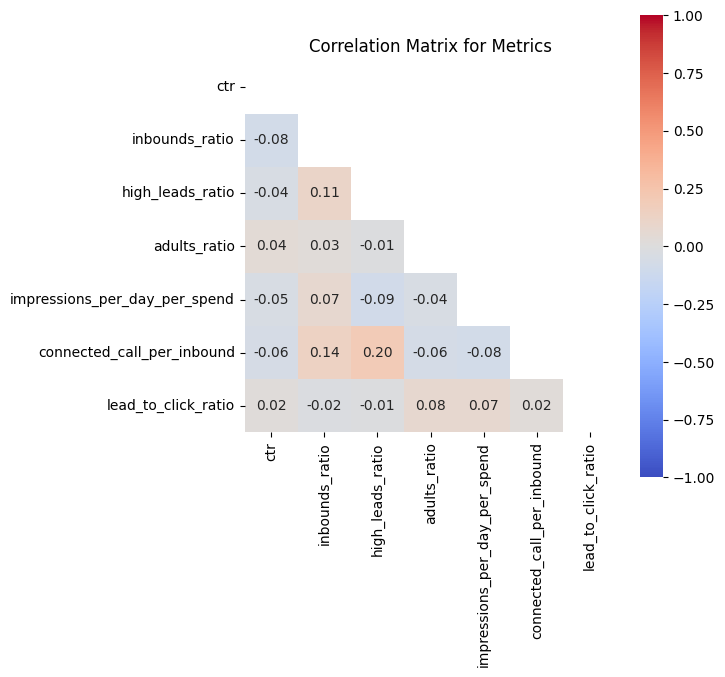

In [58]:
corrs = df_cleaned.corr()
mask = np.triu(np.ones_like(corrs, dtype = bool))
plt.figure(figsize=(6,6))
sns.heatmap(corrs.where(~mask), annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar=True, fmt=".2f")
plt.title("Correlation Matrix for Metrics")
plt.show()

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(df):
    vif = pd.DataFrame()
    vif['features'] = pd.Series(df.columns)
    vif['VIF_values'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
    return vif.sort_values(by='VIF_values').reset_index(drop=True)

compute_vif(df_cleaned)

,features,VIF_values
0,lead_to_click_ratio,1.023254
1,ctr,1.189021
2,connected_call_per_inbound,1.480079
3,impressions_per_day_per_spend,1.495146
4,adults_ratio,1.712319
5,high_leads_ratio,2.901141
6,inbounds_ratio,4.626469


In [60]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split the data into training and testing sets
scaler = MinMaxScaler()
roas_reshape = roas.values.reshape(len(roas),1)
roas_scaled = scaler.fit_transform(roas_reshape)
y = pd.Series(roas_scaled.reshape(len(roas)))
X = scaler.fit_transform(df_cleaned)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Add a constant (intercept) term for statsmodels
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the OLS model with training data
model = sm.OLS(y_train.reset_index(drop=True), X_train_const).fit()

print(model.summary())

y_est = model.predict(X_train_const)

mse_train = mean_squared_error(y_train, y_est)
rmse_train = mse_train**0.5
r2_train = r2_score(y_train,y_est)
mae_train = mean_absolute_error(y_train, y_est)

print("\nTrain Data Results:")
print("Mean Squared Error = %.4f"%(mse_train))
print(f"Root Mean Squared Error = {rmse_train:.4f}")
print(f"R^2 score = {r2_train:.4f}")
print(f"Mean Absolute Error = {mae_train:.4f}")

y_pred = model.predict(X_test_const)

# Evaluate the performance on the test set
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R^2 score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

# Print metrics
print("\nTest Data Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.137
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           0.000171
Time:                        13:58:50   Log-Likelihood:                 53.463
No. Observations:                 961   AIC:                            -90.93
Df Residuals:                     953   BIC:                            -51.98
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1239      0.036      3.410      0.0

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
roas_reshape = roas.values.reshape(len(roas),1)
roas_scaled = scaler.fit_transform(roas_reshape)
y = pd.Series(roas_scaled.reshape(len(roas)))
X = scaler.fit_transform(df_cleaned)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
r2_train = model.score(X_train, y_train)

cols = df_cleaned.columns
# Standardized coefficients
print("Standardized Coefficients and R^2 values:")
coefficients = model.coef_
for feature, coeff in sorted(zip(cols,coefficients),key = lambda x: x[1], reverse=True):
    print(f"{feature}: {coeff:.4f}")

y_est = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_est)
rmse_train = mse_train**0.5
r2_train = r2_score(y_train,y_est)
mae_train = mean_absolute_error(y_train, y_est)

print("\nTrain Data Results:")
print("Mean Squared Error = %.4f"%(mse_train))
print(f"Root Mean Squared Error = {rmse_train:.4f}")
print(f"R^2 score = {r2_train:.4f}")
print(f"Mean Absolute Error = {mae_train:.4f}")

y_pred = model.predict(X_test)
r2 = model.score(X_test, y_test)
# Evaluate the performance on the test set
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = mse ** 0.5  # Root Mean Squared Error
# r2 = r2_score(y_test, y_pred)  # R^2 score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

# Print metrics
print("\nTest Data Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Standardized Coefficients and R^2 values:
connected_call_per_inbound: 0.1297
adults_ratio: 0.0698
high_leads_ratio: 0.0302
ctr: 0.0235
inbounds_ratio: -0.0124
lead_to_click_ratio: -0.0176
impressions_per_day_per_spend: -0.0820

Train Data Results:
Mean Squared Error = 0.9752
Root Mean Squared Error = 0.9875
R^2 score = 0.0339
Mean Absolute Error = 0.7641

Test Data Results:
Mean Squared Error (MSE): 0.9520
Root Mean Squared Error (RMSE): 0.9757
R^2 Score: 0.0082
Mean Absolute Error (MAE): 0.7673


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
roas_reshape = roas.values.reshape(len(roas),1)
roas_scaled = scaler.fit_transform(roas_reshape)
y = pd.Series(roas_scaled.reshape(len(roas)))
X = scaler.fit_transform(df_cleaned)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Assuming df_cleaned is your feature DataFrame and its columns correspond to feature names
feature_names = df_cleaned.columns

# Extract Gini importance
importances = model.feature_importances_

# Combine feature names and importances into a sorted list
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Print feature importances
print("Feature Importances (Gini):")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

y_est = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_est)
rmse_train = mse_train**0.5
r2_train = r2_score(y_train,y_est)
mae_train = mean_absolute_error(y_train, y_est)

print("\nTrain Data Results:")
print("Mean Squared Error = %.4f"%(mse_train))
print(f"Root Mean Squared Error = {rmse_train:.4f}")
print(f"R^2 score = {r2_train:.4f}")
print(f"Mean Absolute Error = {mae_train:.4f}")

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the performance on the test set
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R^2 score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

# Print metrics
print("\n Test Data Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Feature Importances (Gini):
connected_call_per_inbound: 0.2029
adults_ratio: 0.1763
inbounds_ratio: 0.1713
impressions_per_day_per_spend: 0.1220
lead_to_click_ratio: 0.1199
high_leads_ratio: 0.1180
ctr: 0.0895

Train Data Results:
Mean Squared Error = 0.1002
Root Mean Squared Error = 0.3166
R^2 score = 0.8999
Mean Absolute Error = 0.2140

 Test Data Results:
Mean Squared Error (MSE): 0.7498
Root Mean Squared Error (RMSE): 0.8659
R^2 Score: 0.2471
Mean Absolute Error (MAE): 0.6067
